In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split

from lls import LinearLeastSquare

### Load data

Download Dollar Rial Price dataset from [Kaggle](https://www.kaggle.com/datasets/mohammadtaghizadeh/dollar-rial-price-dataset) or [GitHub](https://github.com/M-Taghizadeh/Dollar_Rial_Price_Dataset)

In [2]:
data = pd.read_csv("Dollar_Rial_Price_Dataset.csv")
data.head()

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700","13,700"
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440","13,440"
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350","13,350"
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400","13,400"
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500","13,500"


### Preprocessing data

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

# Remove comma from numbers
for col in ["Open", "Low", "High", "Close"]:
    data[col] = data[col].apply(lambda x: re.sub(',', '', x))
    data[col] = data[col].astype(float)

# Convert date to number (2020/1/1 -> 20200101) for using in linear regression
data['Date_Number'] = data['Date'].map(lambda date: 10000*date.year + 100*date.month + date.day)

# Remove Persian_Date column, because we don't need it anymore
data.drop(['Persian_Date'], axis=1, inplace=True)

data.head()

,Unnamed: 0,Date,Open,Low,High,Close,Date_Number
0,0,2011-11-27,13700.0,13700.0,13700.0,13700.0,20111127
1,1,2011-11-28,13440.0,13440.0,13440.0,13440.0,20111128
2,2,2011-11-29,13350.0,13350.0,13350.0,13350.0,20111129
3,3,2011-11-30,13400.0,13400.0,13400.0,13400.0,20111130
4,4,2011-12-01,13500.0,13500.0,13500.0,13500.0,20111201


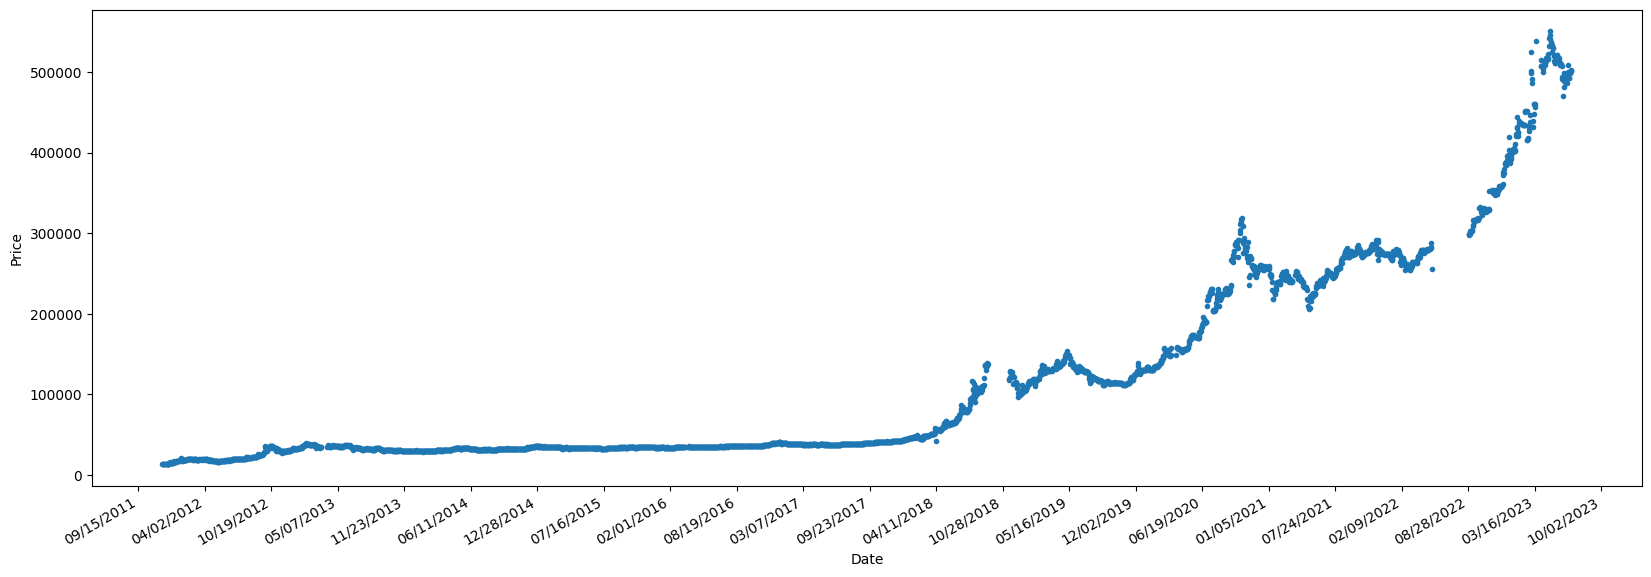

In [4]:
plt.figure(figsize=(20, 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
plt.scatter(data["Date"], data["Close"], marker='.')
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()

First we analyze dollar price in **Ahmadi Nejad**'s presidency.

In [5]:
ahmadinejad_data = data[(data['Date'] <= '2013-03-08')].reset_index(drop=True)
ahmadinejad_data

,Unnamed: 0,Date,Open,Low,High,Close,Date_Number
0,0,2011-11-27,13700.0,13700.0,13700.0,13700.0,20111127
1,1,2011-11-28,13440.0,13440.0,13440.0,13440.0,20111128
2,2,2011-11-29,13350.0,13350.0,13350.0,13350.0,20111129
3,3,2011-11-30,13400.0,13400.0,13400.0,13400.0,20111130
4,4,2011-12-01,13500.0,13500.0,13500.0,13500.0,20111201
...,...,...,...,...,...,...,...
372,372,2013-03-03,36100.0,34900.0,36100.0,34900.0,20130303
373,373,2013-03-04,33900.0,32850.0,33900.0,33050.0,20130304
374,374,2013-03-05,33300.0,33300.0,34700.0,34400.0,20130305
375,375,2013-03-06,34800.0,34800.0,35900.0,35900.0,20130306


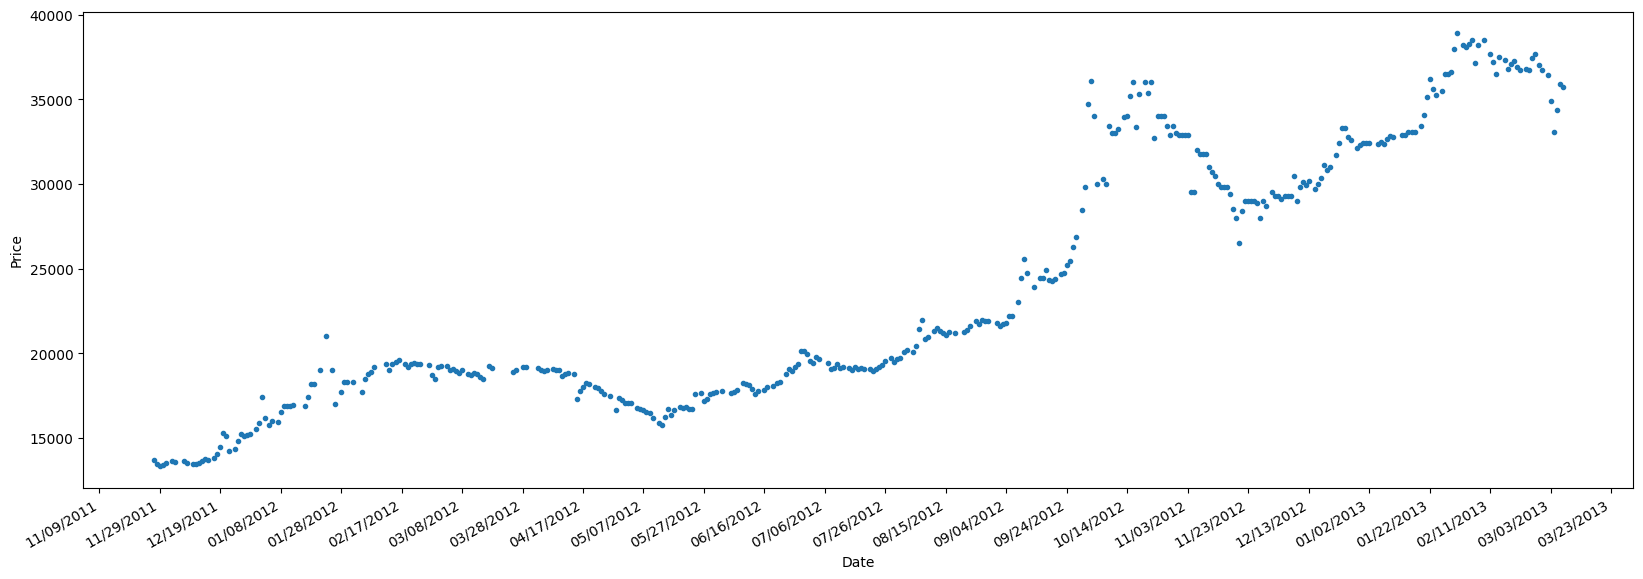

In [6]:
plt.figure(figsize=(20, 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.scatter(ahmadinejad_data["Date"], ahmadinejad_data["Close"], marker='.')
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()

In [7]:
X = np.array(ahmadinejad_data[["Date_Number"]])
Y = np.array(ahmadinejad_data[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((282, 1), (282, 1), (95, 1), (95, 1))

In [8]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)
mae_loss = lls.evaluate(X_test, Y_test, loss="MAE")
print("MAE Loss:", round(mae_loss, 2), "Rial", "≃", round(mae_loss/10), "Toman")

MAE Loss: 6175.31 Rial ≃ 618 Toman


Then we analyze dollar price in **Rouhani**'s presidency.

In [9]:
rouhani_data = data[(data['Date'] > '2013-03-08') & (data['Date'] <= '2021-03-08')].reset_index(drop=True)
rouhani_data

,Unnamed: 0,Date,Open,Low,High,Close,Date_Number
0,377,2013-03-09,35450.0,34800.0,35450.0,34800.0,20130309
1,378,2013-03-10,34850.0,34450.0,34850.0,34750.0,20130310
2,379,2013-03-11,35300.0,34900.0,35500.0,35100.0,20130311
3,380,2013-03-12,35050.0,34700.0,35050.0,34750.0,20130312
4,381,2013-03-13,34300.0,34100.0,34450.0,34400.0,20130313
...,...,...,...,...,...,...,...
2362,2739,2021-03-03,244330.0,244330.0,247910.0,246680.0,20210303
2363,2740,2021-03-04,246700.0,246530.0,246790.0,246610.0,20210304
2364,2741,2021-03-06,246580.0,242700.0,246770.0,242710.0,20210306
2365,2742,2021-03-07,242800.0,239850.0,242810.0,239900.0,20210307


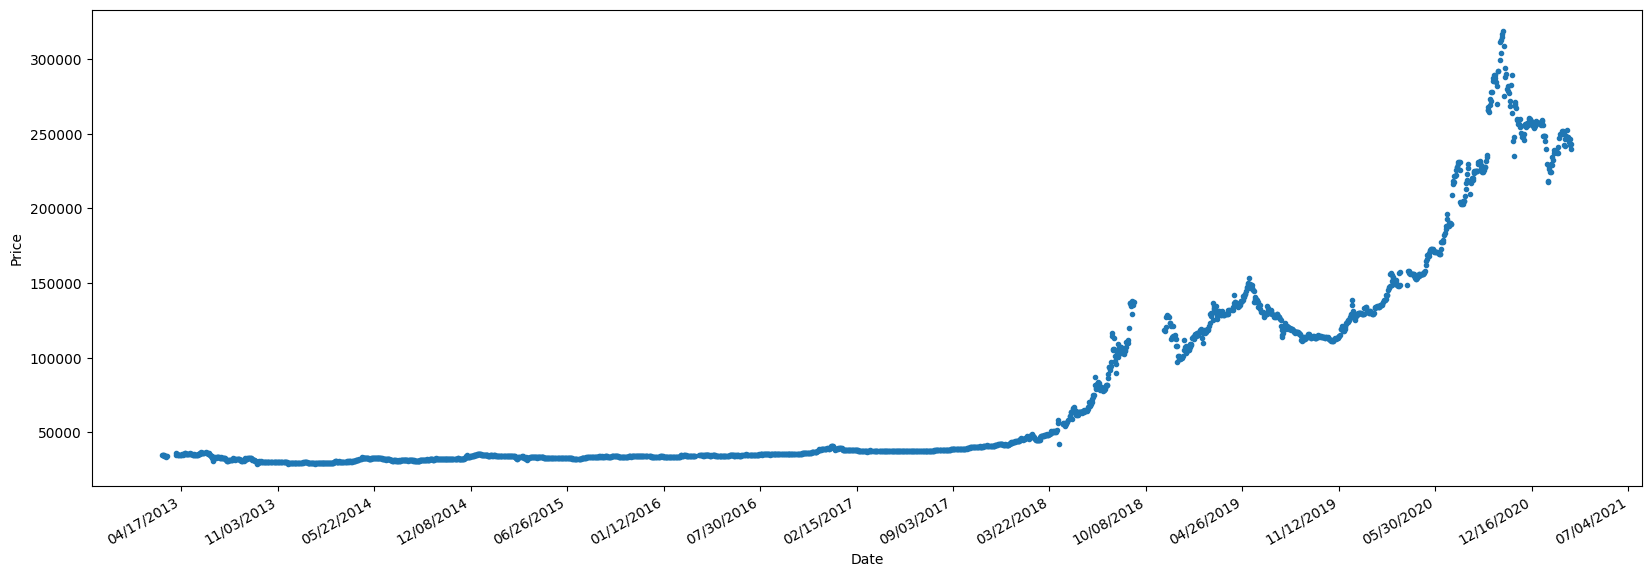

In [10]:
plt.figure(figsize=(20, 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200))
plt.scatter(rouhani_data["Date"], rouhani_data["Close"], marker='.')
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()

In [11]:
X = np.array(rouhani_data[["Date_Number"]])
Y = np.array(rouhani_data[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1775, 1), (1775, 1), (592, 1), (592, 1))

In [12]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)
mae_loss = lls.evaluate(X_test, Y_test, loss="MAE")
print("MAE Loss:", round(mae_loss, 2), "Rial", "≃", round(mae_loss/10), "Toman")

MAE Loss: 53753.17 Rial ≃ 5375 Toman


Finally we analyze dollar price in **Raisi**'s presidency.

In [13]:
raisi_data = data[(data['Date'] > '2021-03-08')].reset_index(drop=True)
raisi_data

,Unnamed: 0,Date,Open,Low,High,Close,Date_Number
0,2744,2021-03-09,243240.0,241050.0,244280.0,242070.0,20210309
1,2745,2021-03-10,242100.0,241240.0,242710.0,242420.0,20210310
2,2746,2021-03-13,242400.0,241770.0,243850.0,241770.0,20210313
3,2747,2021-03-14,241810.0,239100.0,241880.0,239170.0,20210314
4,2748,2021-03-15,239200.0,239100.0,239210.0,239170.0,20210315
...,...,...,...,...,...,...,...
561,3305,2023-07-01,492660.0,492600.0,498400.0,498220.0,20230701
562,3306,2023-07-02,500810.0,498600.0,500900.0,499340.0,20230702
563,3307,2023-07-03,503210.0,501400.0,503400.0,502000.0,20230703
564,3308,2023-07-04,502140.0,498300.0,502200.0,500750.0,20230704


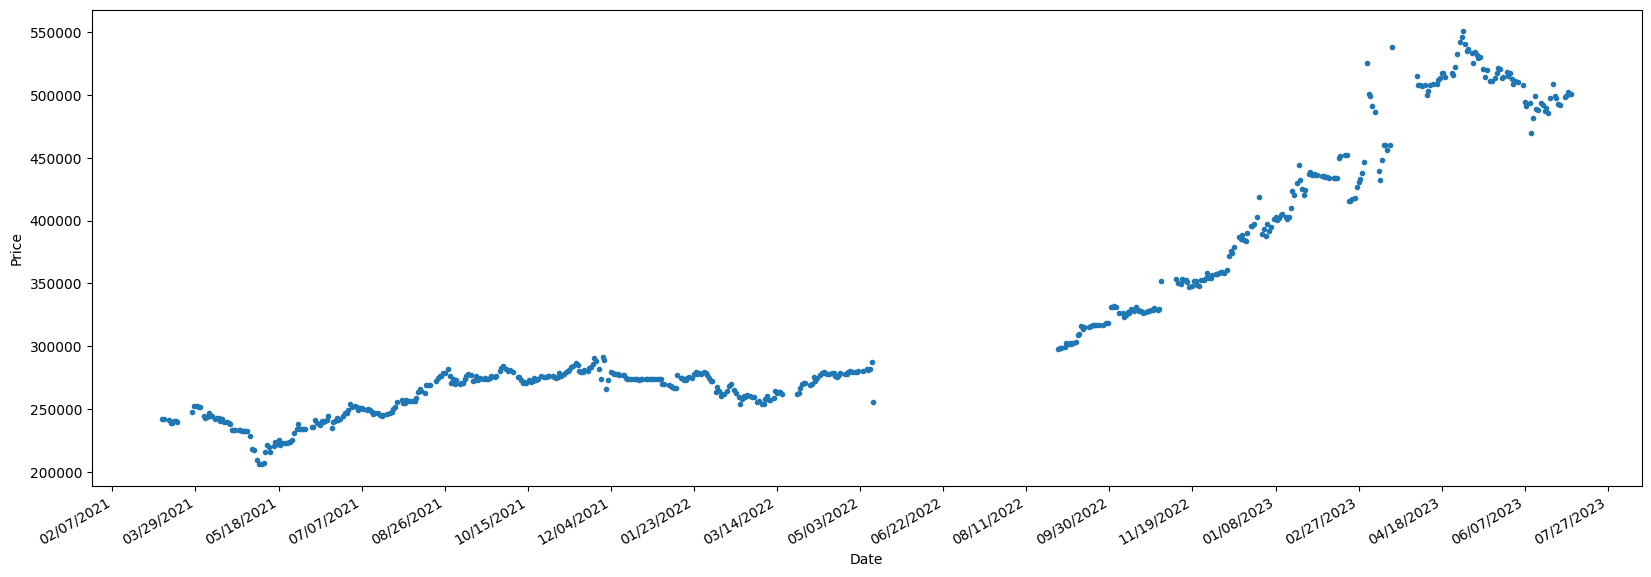

In [14]:
plt.figure(figsize=(20, 7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.scatter(raisi_data["Date"], raisi_data["Close"], marker='.')
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()

In [15]:
X = np.array(raisi_data[["Date_Number"]])
Y = np.array(raisi_data[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((424, 1), (424, 1), (142, 1), (142, 1))

In [16]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)
mae_loss = lls.evaluate(X_test, Y_test, loss="MAE")
print("MAE Loss:", round(mae_loss, 2), "Rial", "≃", round(mae_loss/10), "Toman")

MAE Loss: 78283.02 Rial ≃ 7828 Toman
